In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# # Implementing the updated code for ultra-high resolution torus

# R = 2 # Major circle radius
# r = 1 # Minor circle radius
# n = 800 # resolution parameter
# u = np.linspace(0, 2 * np.pi, n)  # Increased resolution for u
# v = np.linspace(0, 2 * np.pi, n)  # Increased resolution for v
# u, v = np.meshgrid(u, v)

# # Updating the torus equation with the higher resolution
# x = (R + r * np.cos(v)) * np.cos(u)
# y = (R + r * np.cos(v)) * np.sin(u)
# z = r * np.sin(v)

# # Plotting with the highest resolution, light grey color, and slightly higher alpha value
# fig = plt.figure(figsize=(12, 10))
# ax = fig.add_subplot(111, projection='3d')
# ax.plot_surface(x, y, z, color='lightgrey', rstride=2, cstride=2, alpha=1.0)

# # Setting the axes properties with the same limits
# ax.set_xlim(-3, 3)
# ax.set_ylim(-3, 3)
# ax.set_zlim(-3, 3)
# ax.set_xlabel('X axis')
# ax.set_ylabel('Y axis')
# ax.set_zlabel('Z axis')
# ax.set_title('Ultra High Resolution 3D Torus in Light Grey')

# plt.show()


In [8]:
# Define the system
def double_circle_rotation(t, omega_1, omega_2):
    theta_1 = (omega_1 * t) % (2 * np.pi)
    theta_2 = (omega_2 * t) % (2 * np.pi)
    return theta_1, theta_2

# Convert to Cartesian coordinate
def compute_torus_coords(theta_1, theta_2, R, r):
    x = (R + r * np.cos(theta_2)) * np.cos(theta_1)
    y = (R + r * np.cos(theta_2)) * np.sin(theta_1)
    z = r * np.sin(theta_2)
    return x, y, z

In [ ]:
# # Ratio of omega_2/omega_1 is irrational
# omega_1 = 1
# omega_2 = np.sqrt(2)
# R, r = 2, 1  # Major and minor radius

# # Time steps for the simulation
# m = 100 # 100 time steps
# t_values = np.linspace(0, m, 100*m)  # 100*m points over m time steps

# # Compute the trajectory on the torus
# torus_trajectory = [compute_torus_coords(*double_circle_rotation(t, omega_1, omega_2), R, r) for t in t_values]

# # Extract x, y, z coordinates for the trajectory
# x_vals, y_vals, z_vals = zip(*torus_trajectory)

# # Creating a smoother torus mesh
# n = 1000 # resolution parameter
# theta = np.linspace(0, 2 * np.pi, n) # major angle
# phi = np.linspace(0, 2 * np.pi, n) # minor angle
# theta, phi = np.meshgrid(theta, phi)
# X = (R + r * np.cos(phi)) * np.cos(theta)
# Y = (R + r * np.cos(phi)) * np.sin(theta)
# Z = r * np.sin(phi)

# # Creating the figure
# fig = plt.figure(figsize=(16, 8))  # Adjusted figure size to accommodate two plots

# # 3D plot
# ax1 = fig.add_subplot(121, projection='3d')  # First subplot for 3D plot
# # ax1.plot_surface(X, Y, Z, color='cyan', alpha=0.3, edgecolor='none', shade=False)
# ax1.plot(x_vals, y_vals, z_vals, color='blue')

# # Setting title, labels, and limits for 3D plot
# title = 'Trajectory of a Point on a Torus\n' + \
#         r'($\omega_1 = 1$, $\omega_2 = \sqrt{2}$)'
# ax1.set_title(title, fontsize=20)
# ax1.set_xlabel('X axis')
# ax1.set_ylabel('Y axis')
# ax1.set_zlabel('Z axis')
# ax1.set_xlim([-3, 3])
# ax1.set_ylim([-3, 3])
# ax1.set_zlim([-3, 3])

# # 2D projection plot
# ax2 = fig.add_subplot(122)  # Second subplot for 2D projection
# ax2.plot(x_vals, y_vals, color='blue')

# # Setting labels for 2D plot
# ax2.set_title('2D Projection on XY-plane', fontsize=20)
# ax2.set_xlabel('X axis')
# ax2.set_ylabel('Y axis')
# ax2.set_xlim([-3, 3])
# ax2.set_ylim([-3, 3])

# plt.show()


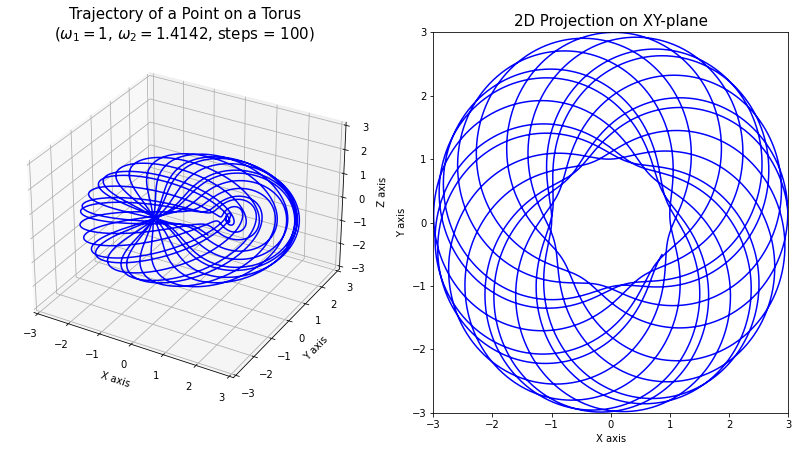

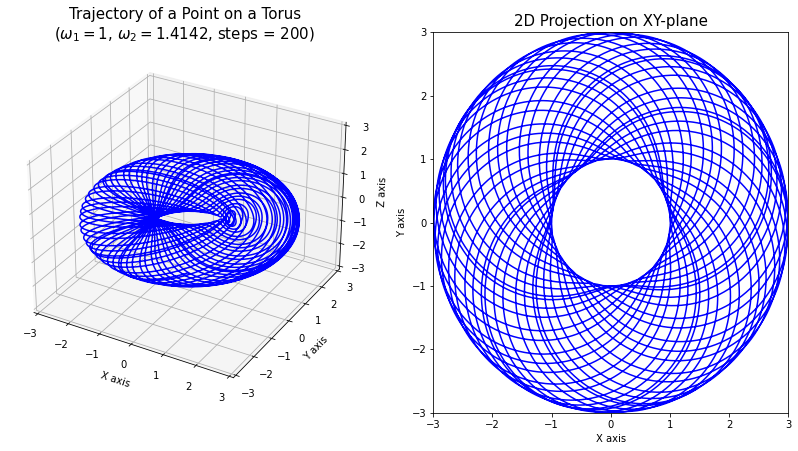

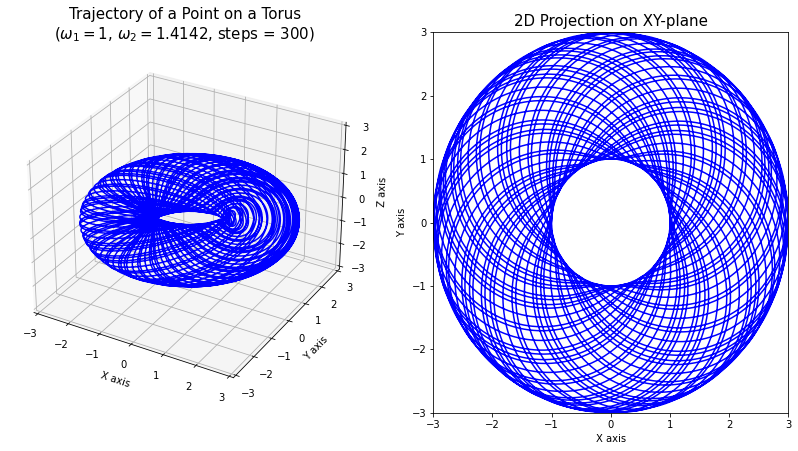

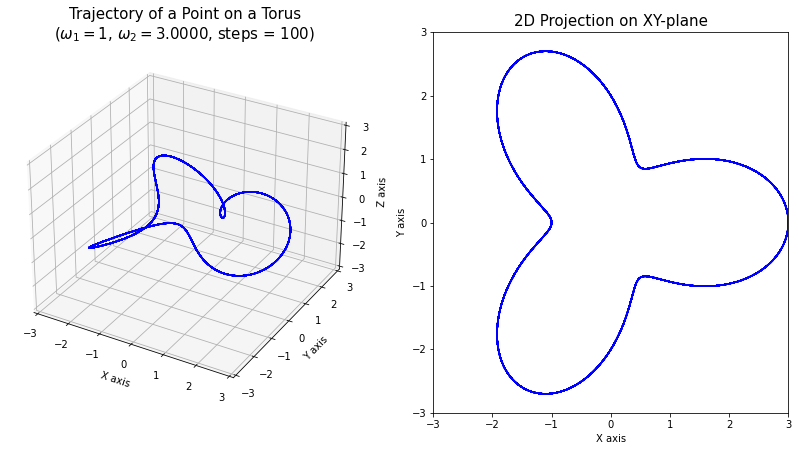

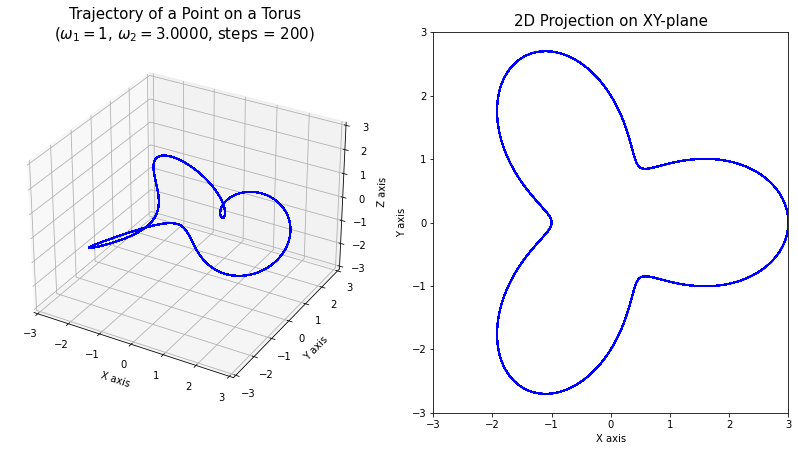

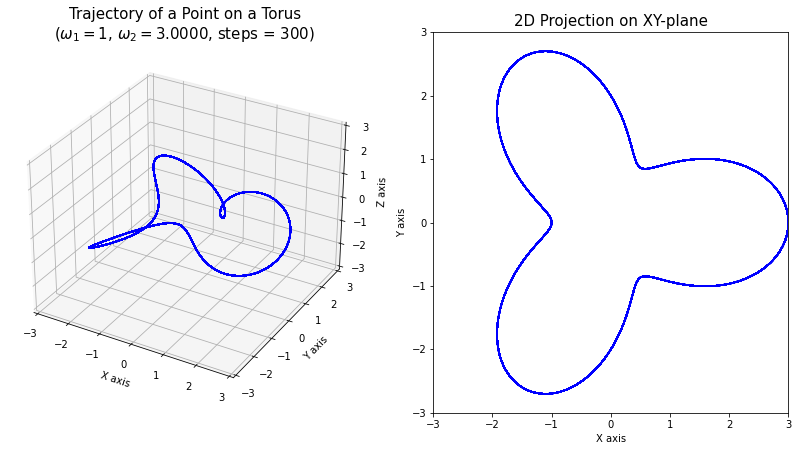

In [9]:
# Constants
omega_1 = 1
R, r = 2, 1  # Major and minor radius

# Omega_2 values and time steps
omega_2_values = [np.sqrt(2), 3]  # You can add more values if needed
time_steps = [100, 200, 300]  # Different time steps

# Loop over omega_2 values and time steps
for omega_2 in omega_2_values:
    for m in time_steps:
        # Time values for the simulation
        t_values = np.linspace(0, m, 100*m)  # 100*m points over m time steps
        
        # Compute the trajectory on the torus for each time step
        torus_trajectory = [compute_torus_coords(*double_circle_rotation(t, omega_1, omega_2), R, r) for t in t_values]

        # Extract x, y, z coordinates for the trajectory
        x_vals, y_vals, z_vals = zip(*torus_trajectory)

        # Creating a smoother torus mesh
        n = 1000  # resolution parameter
        theta = np.linspace(0, 2 * np.pi, n)  # major angle
        phi = np.linspace(0, 2 * np.pi, n)  # minor angle
        theta, phi = np.meshgrid(theta, phi)
        X = (R + r * np.cos(phi)) * np.cos(theta)
        Y = (R + r * np.cos(phi)) * np.sin(theta)
        Z = r * np.sin(phi)

        # Plotting
        fig = plt.figure(figsize=(14, 7))

        # 3D plot
        ax1 = fig.add_subplot(121, projection='3d')
        ax1.plot(x_vals, y_vals, z_vals, color='blue')

        # Setting title and labels for 3D plot
        # title = 'Trajectory of a Point on a Torus\n' + \
        #         f'($\omega_1 = 1$, $\omega_2 = {omega_2}$, steps = {m})'

        # Format the display of omega_2
        omega_2_display = f'{omega_2:.4f}'

        # Setting title and labels for 3D plot
        title = f'Trajectory of a Point on a Torus\n' + \
             f'($\omega_1 = 1$, $\omega_2 = {omega_2_display}$, steps = {m})'
        ax1.set_title(title, fontsize=15)
        ax1.set_xlabel('X axis')
        ax1.set_ylabel('Y axis')
        ax1.set_zlabel('Z axis')
        ax1.set_xlim([-3, 3])
        ax1.set_ylim([-3, 3])
        ax1.set_zlim([-3, 3])

        # 2D projection plot
        ax2 = fig.add_subplot(122)
        ax2.plot(x_vals, y_vals, color='blue')

        # Setting labels for 2D plot
        ax2.set_title('2D Projection on XY-plane', fontsize=15)
        ax2.set_xlabel('X axis')
        ax2.set_ylabel('Y axis')
        ax2.set_xlim([-3, 3])
        ax2.set_ylim([-3, 3])

        # Show plot for this iteration
        plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def double_circle_rotation(t, omega_1, omega_2):
    theta_1 = (omega_1 * t) % (2 * np.pi)
    theta_2 = (omega_2 * t) % (2 * np.pi)
    return theta_1, theta_2

omega_1, omega_2 = 1, np.sqrt(2)

In [3]:
# Initial angular coordinates for the 10,000 points
initial_theta_1_vals = np.linspace(0, 2*np.pi, 40)
initial_theta_2_vals = np.linspace(0, 2*np.pi, 40)
initial_angular_coords = [(t1, t2) for t1 in initial_theta_1_vals for t2 in initial_theta_2_vals] # shape 10000, type 1ist

# Number of time steps and steps along the trajectory
num_time_steps = 100  # Evolve by 100 steps
total_points = len(initial_angular_coords)

# Creating a 3D array to store the data
DATA = np.zeros((total_points, num_time_steps, 2))  # Shape: (1600 points, 100 time steps, 2 coordinates)

# Evolving each point and storing the data in DATA
for i, (t1, t2) in enumerate(initial_angular_coords):
    for step in range(num_time_steps):
        # Compute the incremental rotation
        theta_1, theta_2 = double_circle_rotation(step, omega_1, omega_2)
        
        # Add the rotated angle to the initial angles
        evolved_theta_1, evolved_theta_2 = (t1 + theta_1) % (2 * np.pi), (t2 + theta_2) % (2 * np.pi)
        
        # Store in DATA
        DATA[i, step] = [evolved_theta_1, evolved_theta_2]

print(DATA.shape)  # (1600, 100, 2)

(1600, 100, 2)


In [4]:
# Extracting data from DATA to form DATA_X and DATA_Y
X = DATA[:, :-1, :]
Y = DATA[:, 1:, :]
print(X.shape)

# Reshape DATA_X and DATA_Y into 2D matrices
X = X.reshape(-1, X.shape[-1])
Y = Y.reshape(-1, Y.shape[-1])
print(X.shape)

(1600, 99, 2)
(158400, 2)


Manually select Fourier basis.

In [13]:
# Apply Fourier basis
from fourier_2d import fourier_2d

# Generating a list of 2D frequency vectors
# Specify the range for frequency components
# For example, we can use -100 to 100 for both dimensions
frequency_range = range(-30, 31)

# Generate the list of frequency vectors
frequency_vectors = [(n1, n2) for n1 in frequency_range for n2 in frequency_range]

Psi_X = fourier_2d(X, frequency_vectors) # basis matrix
Psi_Y = fourier_2d(Y, frequency_vectors)
print(Psi_X.shape)

(158400, 3721)


In [ ]:
# Compute the pseudoinverse of X
Psi_X_pinv = np.linalg.pinv(Psi_X)

# Compute the product of the pseudoinverse of X and Y
K = Psi_X_pinv @ Psi_Y

eigenvalues, eigenvectors = np.linalg.eig(K)
# Sort the indices of eigenvalues based on the real part, from largest to smallest
sorted_indices = np.argsort(np.real(eigenvalues))[::-1]

# Use the sorted indices to rearrange the eigenvalues
eigenvalues = eigenvalues[sorted_indices]

In [ ]:
print(eigenvalues)
print(X.shape)  # (N, D) where D is the number of dimensions

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))  # Increase the figure size for better visibility
plt.scatter(np.real(eigenvalues), np.imag(eigenvalues), color='blue', label='Eigenvalues', s=10)
circle = plt.Circle((0, 0), 1, color='red', fill=False, label='Unit Circle')
plt.gca().add_artist(circle)

plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.title('Eigenvalues in the Unit Circle')
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.grid(True)
plt.legend(loc='upper right')

# Set the axis limits to show the full unit circle with some padding
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Set the aspect of the plot to be equal
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

## Calculate the number of eigenvalues which are near 0 point
# Calculate the distance of each eigenvalue from the origin
distances = np.abs(eigenvalues)

# Count the number of eigenvalues within the specified radius
num_near_zero = np.sum(distances < 0.1)

# Print the count
print("Number of eigenvalues near 0 point (within radius 0.1):", num_near_zero)


Train the basis using EDMD-DL and NN-resDMD.

In [ ]:
# # Initial angular coordinates for the 900 points
# initial_theta_1_vals = np.linspace(0, 2*np.pi, 30)
# initial_theta_2_vals = np.linspace(0, 2*np.pi, 30)
# initial_angular_coords = [(t1, t2) for t1 in initial_theta_1_vals for t2 in initial_theta_2_vals] # shape 10000, type 1ist

# # Number of time steps and steps along the trajectory
# num_time_steps = 20  # Evolve by 20 steps
# total_points = len(initial_angular_coords)

# # Creating a 3D array to store the data
# DATA = np.zeros((total_points, num_time_steps, 3))  # Shape: (900 points, 20 time steps, 3 coordinates)

# # Evolving each point and storing the data in DATA
# for i, (t1, t2) in enumerate(initial_angular_coords):
#     for step in range(num_time_steps):
#         # Compute the angular positions at each time step
#         evolved_theta_1, evolved_theta_2 = double_circle_rotation(step, t1, t2)
#         # Compute the Cartesian coordinates
#         x, y, z = compute_torus_coords(evolved_theta_1, evolved_theta_2, R, r)
#         # Store in DATA
#         DATA[i, step] = [x, y, z]

# print(DATA.shape)  # (900, 20, 3)

# # Extracting data from DATA to form DATA_X and DATA_Y
# # DATA_X will contain data from the first 19 snapshots (time steps 0 to 18)
# DATA_X = DATA[:, :-1, :]

# # DATA_Y will contain data from the last 19 snapshots (time steps 1 to 19)
# DATA_Y = DATA[:, 1:, :]

# # Reshape DATA_X and DATA_Y into 2D matrices
# X = DATA_X.reshape(-1, DATA_X.shape[-1])
# Y = DATA_Y.reshape(-1, DATA_Y.shape[-1])

# print(X.shape)  # (17100, 3)


In [5]:
len_all = X.shape[0]
data_x_train = X[:int(0.7*len_all)]
data_x_valid = X[int(0.7*len_all)+1:]

data_y_train = Y[:int(0.7*len_all)]
data_y_valid = Y[int(0.7*len_all)+1:]

data_train = [data_x_train, data_y_train]
data_valid = [data_x_valid, data_y_valid]

In [ ]:
### Calculate for chosen number of basis ###
# Results from solver_edmd/solver_resdmd
from solver_resdmd import KoopmanNN, KoopmanSolver
# from solver_edmd import KoopmanNN, KoopmanSolver

basis_function = KoopmanNN(layer_sizes=[100,100,100], n_psi_train=97) # basis number would be 100

solver = KoopmanSolver(dic=basis_function,
                         target_dim=np.shape(data_x_train)[-1],
                         reg=0.1)
solver.build(data_train=data_train,
             data_valid=data_valid,
             epochs=300,
             batch_size=160000,
             lr=1e-4,
             log_interval=10,
             lr_decay_factor=.8)

# Results from solver_edmd/solver_resdmd
evalues = solver.eigenvalues.T
efuns = solver.eigenfunctions(X)
kpm_modes = solver.compute_mode().T
N_dict = np.shape(evalues)[0]
Psi_X = solver.get_Psi_X().numpy()
Psi_Y = solver.get_Psi_Y().numpy()
Koopman_matrix_K = solver.K.numpy()
# Psi_X2, Psi_Y2 = solver.get_basis(data_x_train, data_y_train)
# Psi_X2 = Psi_X2.numpy()
# Psi_Y2 = Psi_Y2.numpy()
# jacobian, hessian = solver.get_derivatives(data_x_valid) # Currently the storage is not enough to calculate for larger amount of data
# np_config.enable_numpy_behavior()
outputs = {
    'efuns': efuns,
    'evalues': evalues,
    'kpm_modes': kpm_modes,
    'N_dict': N_dict,
    'K': Koopman_matrix_K,
    'Psi_X': Psi_X,
    'Psi_Y': Psi_Y,
    # 'Psi_X2': Psi_X2,
    # 'Psi_Y2': Psi_Y2,
    # "Jacobian": jacobian,  # Uncomment if needed
    # "Hessian": hessian,    # Uncomment if needed
}

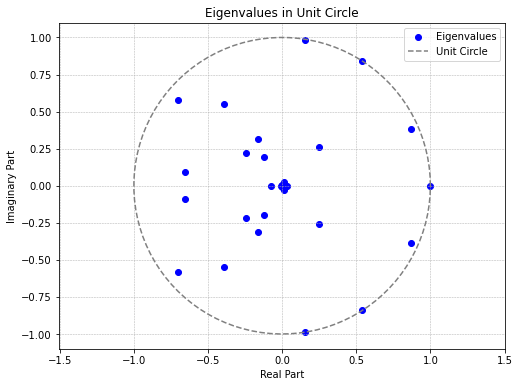

In [7]:
import matplotlib.pyplot as plt

# Assuming evalues is a numpy array of complex numbers
real_parts = evalues.real
imag_parts = evalues.imag

# Create the plot
plt.figure(figsize=(8, 6))
plt.scatter(real_parts, imag_parts, color='blue', label='Eigenvalues')

# Draw a unit circle for reference
theta = np.linspace(0, 2*np.pi, 100)
plt.plot(np.cos(theta), np.sin(theta), linestyle='--', color='grey', label='Unit Circle')

plt.title('Eigenvalues in Unit Circle')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.axis('equal')  # Ensure the aspect ratio is equal to make the unit circle round
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

In [6]:
### Calculate for multiple numbers of basis ###
import os
import scipy.io as sio

# from solver_edmd import KoopmanNN, KoopmanSolver
from solver_resdmd import KoopmanNN, KoopmanSolver

n_psi_train = [25, 50, 75, 100] # basis number would be 25, 50, 75, 100

for n_psi in n_psi_train:
    # Initialize the basis function with the current value of n_psi_train
    basis_function = KoopmanNN(layer_sizes=[100, 100, 100], n_psi_train=n_psi)

    # Initialize the solver with the basis function and other parameters
    solver = KoopmanSolver(dic=basis_function,
                             target_dim=np.shape(data_x_train)[-1],
                             reg=0.1)
    # Build the solver with the specified training and validation data
    solver.build(data_train=data_train,
                 data_valid=data_valid,
                 epochs=300,
                 batch_size=160000,
                 lr=1e-4,
                 log_interval=10,
                 lr_decay_factor=.8)

    # Assuming the user has these functions or similar ones defined in their environment
    evalues = solver.eigenvalues.T
    efuns = solver.eigenfunctions(X)
    kpm_modes = solver.compute_mode().T
    N_dict = np.shape(evalues)[0]
    Koopman_matrix_K = solver.K.numpy()    
    Psi_X = solver.get_Psi_X().numpy()
    Psi_Y = solver.get_Psi_Y().numpy()   
    # Psi_X2, Psi_Y2 = solver.get_basis(data_x_train, data_y_train) # basis are orthonormal
    # Psi_X2 = Psi_X2.numpy()
    # Psi_Y2 = Psi_Y2.numpy() 
    # jacobian, hessian = solver.get_derivatives(data_x_valid) # Currently the storage is not enough to calculate for larger amount of data
    # np_config.enable_numpy_behavior()
    outputs = {
        'efuns': efuns,
        'evalues': evalues,
        'kpm_modes': kpm_modes,
        'N_dict': N_dict,
        'K': Koopman_matrix_K,
        'Psi_X': Psi_X,
        'Psi_Y': Psi_Y,
        # 'Psi_X2': Psi_X2,
        # 'Psi_Y2': Psi_Y2,
        # "Jacobian": jacobian,  # Uncomment if needed
        # "Hessian": hessian,    # Uncomment if needed
    }

    folder_path = 'data/torus_data'  # Adjust the path as needed if you want a different location
    os.makedirs(folder_path, exist_ok=True)
    # Save the outputs to a .mat file named according to the number of basis functions, inside the "data" folder
    file_path = os.path.join(folder_path, f'torus_resdmd_{N_dict}basis.mat')
    sio.savemat(file_path, outputs)
    print(f'Saved outputs for n_psi_train={n_psi} to {file_path}')

Outer Epoch 1/300
Epoch 1/2
1/1 [==============================] - 1s 1s/step - loss: 2.7030e-07 - val_loss: 5.6307e-05
Epoch 2/2
1/1 [==============================] - 0s 374ms/step - loss: 5.6450e-05 - val_loss: 5.8457e-04
Outer Epoch 2/300
Epoch 1/2
1/1 [==============================] - 0s 410ms/step - loss: 8.7076e-06 - val_loss: 6.4493e-04
Epoch 2/2
1/1 [==============================] - 0s 369ms/step - loss: 6.4672e-04 - val_loss: 2.8992e-04
Outer Epoch 3/300
Epoch 1/2
1/1 [==============================] - 0s 411ms/step - loss: 1.9699e-05 - val_loss: 0.0015
Epoch 2/2
1/1 [==============================] - 0s 374ms/step - loss: 0.0015 - val_loss: 2.0742e-04
Outer Epoch 4/300
Epoch 1/2
1/1 [==============================] - 0s 421ms/step - loss: 2.1200e-05 - val_loss: 9.1433e-04
Epoch 2/2
1/1 [==============================] - 0s 368ms/step - loss: 9.1630e-04 - val_loss: 3.9111e-04
Outer Epoch 5/300
Epoch 1/2
1/1 [==============================] - 0s 418ms/step - loss: 2.3691e-05